# Лабораторная работа №4
## Интервальные оценки.
__Вариант 21.__ $Y=arctg(x)$, $m_x = 2$, $\sigma_x=2\sqrt{3}$, $y_0=5$.

*__Задание 1.__* Доверительный интервал для математического ожидания СВ.

_1.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины._

Несмещенная состоятельная оценка математического ожидания вычисляется по формуле:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [42]:
n = 20 #задается вручную

# найдены в 1-й ЛР
a = -4.
b = 8.

In [43]:
# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.arctan(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)

In [44]:
EV = sum(sample_Y) / n
print(EV)

0.03492194909860645


_1.2. Найти точечную оценку дисперсии случайной величины._

Несмещенная состоятельная оценка дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [45]:
def empirical_D(sample_Y, EV):
    D0 = 0.
    for i in sample_Y:
        D0 += (i - EV) ** 2
    D0 = D0 / (len(sample_Y) - 1)
    return D0
D0 = empirical_D(sample_Y, EV)
print(D0)

1.3025602562637706


_1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости._

Уровенями значимости $\gamma$ будут служить значения $0.9$, $0.95$, $0.98$, $0.99$. Так как у распределения Стьюдента будет $n-1=19$ степеней свободы, по таблице определим значения для всех уровней значимости: $t_{0.9, 19}=1.73,t_{0.95, 19}=2.093, t_{0.98, 19}=2.54, t_{0.99, 19}=2.861$

Построим доверительный интервал для каждого $t$:

$$\bar{x}-\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [46]:
gammas = [0.9, 0.95, 0.98, 0.99]
t_rv = sts.t(19)
arr = t_rv.rvs(1000000)

ts = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
    ts.append(tmp[0])
    
#ts = [1.73, 2.093, 2.54, 2.861]
intervals = []

for i in ts:
    intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
intervals

[(-0.4181056538936699, 0.4879495520908828),
 (-0.5129896293, 0.582833527497213),
 (-0.6295559742208529, 0.6993998724180658),
 (-0.7113127128147047, 0.7811566110119176)]

 _1.4. Построить график зависимости величины доверительного интервала от уровня значимости._

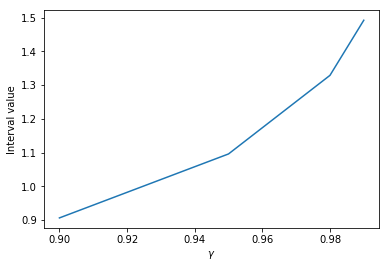

In [47]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3)._

Плотность распределения равна $f(y) = \frac{1}{12 \cos^2(y)}, arctg(-4)<y<arctg(8)$. Тогда теоретическая дисперсия будет равна:

$$D[X] = M[X^2] - M^2[X] = \int_{arctg(-4)}^{arctg(8)} \frac{x^2}{cos^2(x)}dx - \big{(}\int_{arctg(-4)}^{arctg(8)} \frac{x}{cos^2(x)}dx\big{)}^2$$

In [48]:
import scipy.integrate as integrate
DY = integrate.quad(lambda x: (x ** 2 /  (12*np.cos(x) ** 2)), np.arctan(-4), np.arctan(8))[0] - \
(integrate.quad(lambda x: (x / (12*np.cos(x) ** 2)), np.arctan(-4), np.arctan(8)))[0]**2 

print(DY)

1.1475201994496993


_1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости._


In [49]:
intervals2 = []

for i in ts:
    intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
intervals2

[(-0.39029045247716354, 0.46013435067437647),
 (-0.4793486970236218, 0.5491925952208347),
 (-0.5887580467835976, 0.6586019449808105),
 (-0.6654950467652231, 0.735338944962436)]

_1.7. Построить график зависимости величины доверительного интервала от уровня значимости._

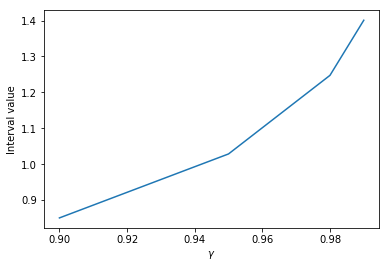

In [50]:
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7._

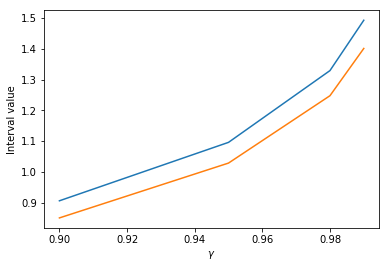

In [51]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

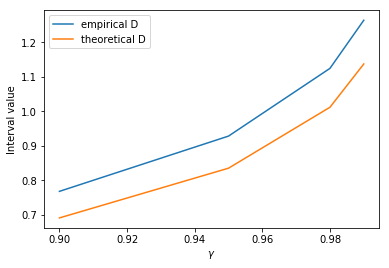

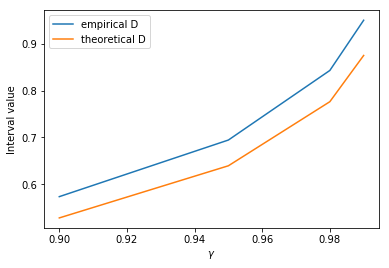

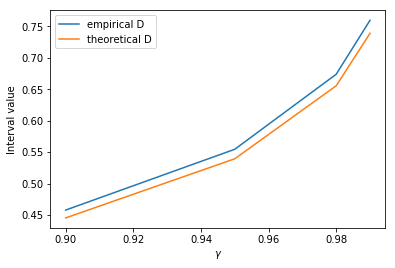

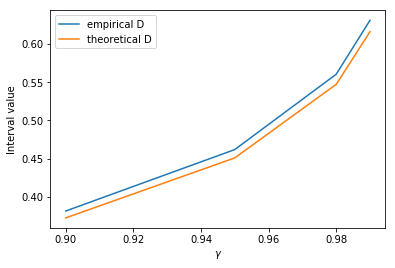

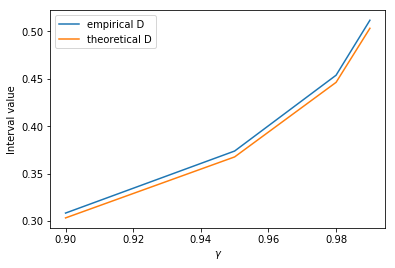

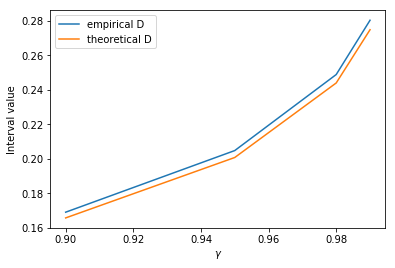

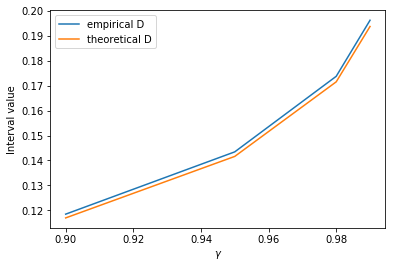

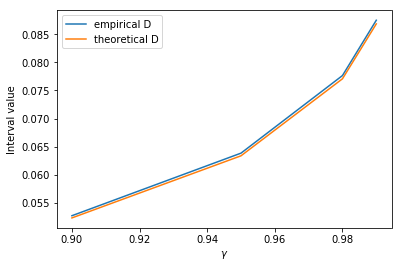

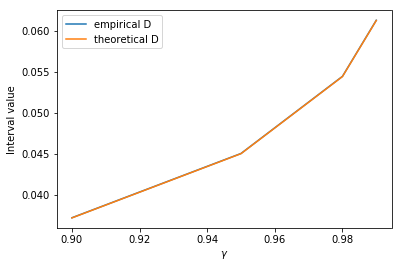

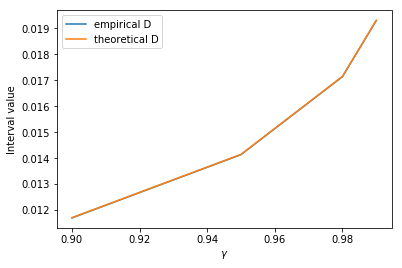

In [52]:
# напишем функцию, объединяющую шаги
def ev_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    t_rv = sts.t(19)
    arr = t_rv.rvs(1000000)
    
    ts = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        ts.append(tmp[0])
        
    intervals = []

    for i in ts:
        intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
    intervals2 = []

    for i in ts:
        intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical D")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical D')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2
    
evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(ev_routine(i))

_1.10. Построить графики зависимости величины доверительного интервала от объема выборки._

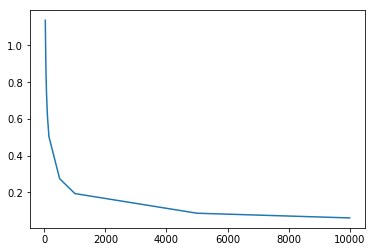

In [53]:
# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])

*__Задание 2.__* Доверительный интервал для дисперсии СВ.

_2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины._

Несмещенная состоятельная оценка дисперсии вычисляется по формуле:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [54]:
n = 20
sample_Y = get_sample(n)
EV = sum(sample_Y) / n
D0 = empirical_D(sample_Y, EV)
print(D0)

1.0821335662307865


_2.2. Найти точечную оценку математического ожидания случайной величины._

Несмещенная состоятельная оценка дисперсии:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [55]:
print(EV)

0.7282152340552739


_2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости._

Уровенями значимости $\gamma$ будут служить значения $0.9$, $0.95$, $0.98$, $0.99$. Так как у $\chi^2$ распределения будет $n-1=19$ степеней свободы, по таблице определим значения для всех уровней значимости $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$: $\chi^2_{0.05, 19}=30.14353$ и $\chi^2_{0.95, 19}=10.11701, \chi^2_{0.025, 19}=32.85233$ и $\chi^2_{0.975, 19}=8.90652, \chi^2_{0.01, 19}=36.19087$ и $\chi^2_{0.99, 19}=7.63273, \chi^2_{0.005, 19}=38.58226$ и $\chi^2_{0.995, 19}=6.84397$

Построим доверительный интервал для каждых $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$:

$$\frac{n\cdot s^2}{\chi^2_{\frac{1-\gamma}{2}, n-1}}\le D_x <\frac{n\cdot s^2}{\chi^2_{\frac{1+\gamma}{2}, n-1}}$$

In [56]:
gammas = [0.9, 0.95, 0.98, 0.99]

chi2_rv = sts.chi2(19)
arr = chi2_rv.rvs(100000)

chip = []
chim = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
    chip.append(tmp[0])
    chim.append(tmp[1])

intervals = []

for i in range(len(chim)):
    intervals.append(((n-1) * D0 / chim[i], (n - 1) * D0 / chip[i]))
    
intervals

[(0.6802322110069547, 2.0464000154304056),
 (0.6244568055676176, 2.3195693586831627),
 (0.5641464323305256, 2.7002138881553885),
 (0.5289796615560347, 3.007761200771672)]

_2.4. Построить график зависимости величины доверительного интервала от уровня значимости._

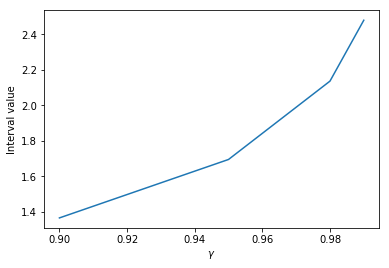

In [57]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3)._

Плотность распределения равна $f(y) = \frac{1}{12 \cos^2(y)}, arctg(-4)<y<arctg(8)$. Тогда теоретическое МО будет равно:

$$M[X] = \int_{arctg(-4)}^{arctg(8)} \frac{x}{cos^2(x)}dx$$

In [58]:
import scipy.integrate as integrate
MY = integrate.quad(lambda x: (x / (12*np.cos(x) ** 2)), np.arctan(-4), np.arctan(8))[0]
print(MY)

0.4664727533661024


_2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости._


In [59]:
intervals2 = []

for i in range(len(chim)):
    intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))
    
intervals2

[(0.7637513909787298, 2.29765781889427),
 (0.7011278591944332, 2.6043670021791914),
 (0.6334125544721103, 3.031747217565499),
 (0.5939279936697214, 3.3770553108925516)]

_2.7. Построить график зависимости величины доверительного интервала от уровня значимости._

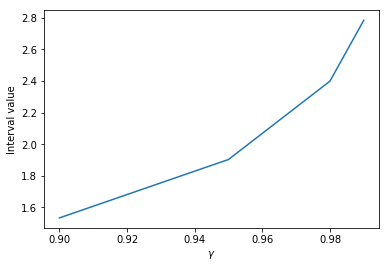

In [60]:
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7._

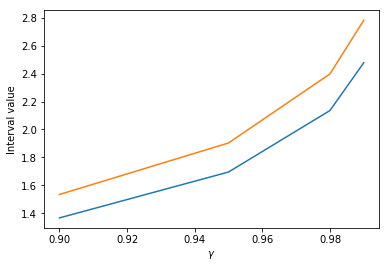

In [61]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

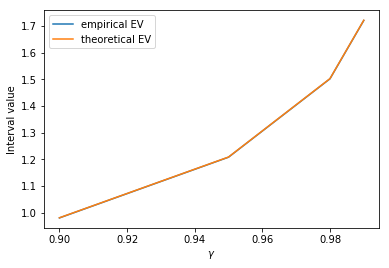

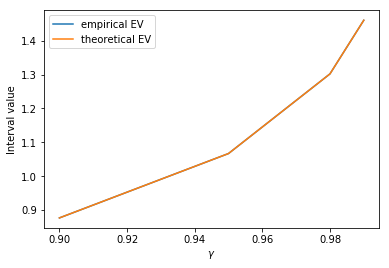

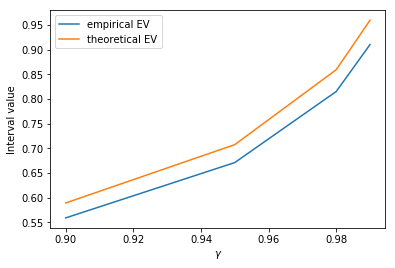

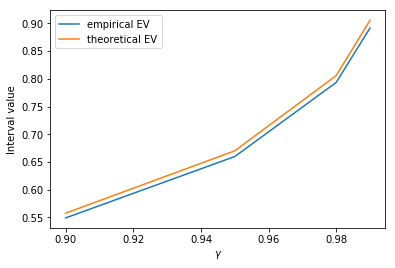

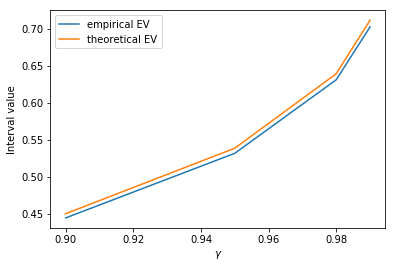

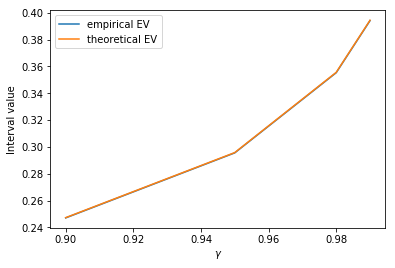

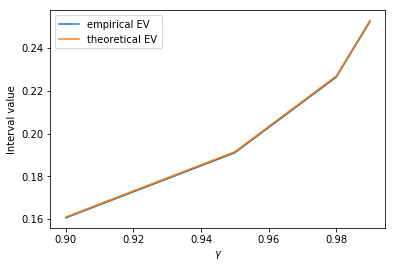

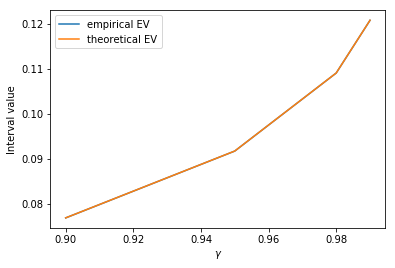

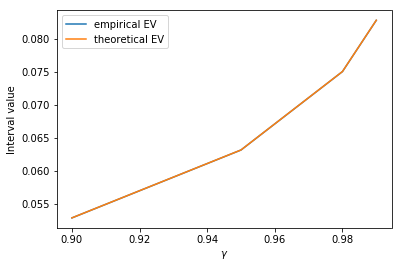

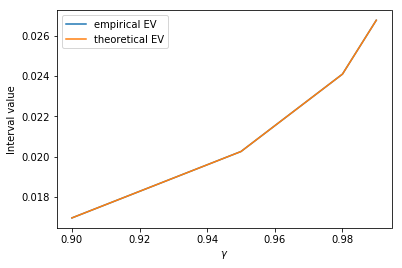

In [62]:
# напишем функцию, объединяющую шаги
def d_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    chi2_rv = sts.chi2(n - 1)
    arr = chi2_rv.rvs(100000)

    chip = []
    chim = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
        chip.append(tmp[0])
        chim.append(tmp[1])
    
    intervals = []

    for i in range(len(chim)):
        intervals.append((n * D0 / chim[i], n * D0 / chip[i]))
    
    intervals2 = []
    
    for i in range(len(chim)):
        intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))

    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical EV")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical EV')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2
    
evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(d_routine(i))

_2.10. Построить графики зависимости величины доверительного интервала от объема выборки._

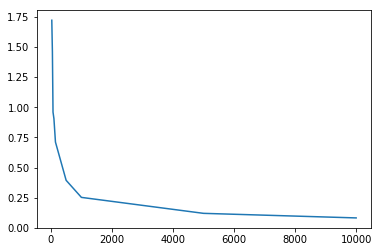

In [63]:
# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])